In [89]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.patches as patches
from PIL import Image

In [100]:
JSON_FILE_NAME_LIST = ['output1_0.88_0.93.json', 'output2_0.92_0.79.json']
JSON_FILE_NAME = JSON_FILE_NAME_LIST[0]

# json 파일의 이미지들 중에 몇번째 이미지인지 (이미지 파일 이름 모를때)
IMAGE_NUM = 3
# 파일명으로 출력하고 싶을때 True 로 바꾸고 사용
USE_FILE_NAME = True
# 파일명 (이미지 파일 이름 알때)
IMAGE_FILE_NAME = 'drp.en_ko.in_house.deepnatural_003442.jpg'
# 새 이미지 파일 저장 위치/prefix (폴더 없으면 만들고 실행해야함. 이거 뒤에 원본파일명 붙여서 저장됨)
IMAGE_OUTPUT_NAME_HEAD = 'output1_'

In [101]:
# Open the JSON file for reading
with open(JSON_FILE_NAME, 'r') as file:
    # Load the JSON data into a dictionary
    data_dict = json.load(file)

data_dict = data_dict['images']

data_dict 하위 구조  
* key : 'images'  
    * key : 이미지 이름들  
        * key : 'words'  
            *  key : bbox 번호들 (string)  
                *  key : 'points'  
                    *  value : [[점1],[점2],[점3],[점4]]  



In [102]:
image_names = list(data_dict.keys())

In [103]:
if USE_FILE_NAME :
    image_name = IMAGE_FILE_NAME
else :
    image_name = image_names[IMAGE_NUM]
    
image_name

'drp.en_ko.in_house.deepnatural_003442.jpg'

In [104]:
bbox_names = list(data_dict[image_name]['words'].keys())

In [105]:
bbox_list = []
for bbox_name in bbox_names :
    bbox_list.append(data_dict[image_name]['words'][bbox_name]['points'])

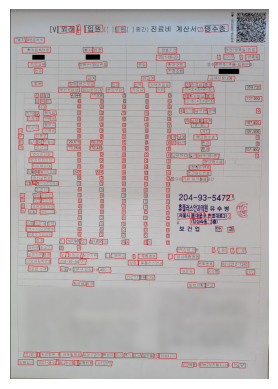

In [106]:
import cv2
import numpy as np

image_path = '/opt/ml/input/data/medical/img/test/' + image_name

# 이미지 로드
image = cv2.imread(image_path)

# plt.axis(False)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.show()

points = np.array(bbox_list)

# 다각형 그리기
cv2.polylines(image, np.int32(points), isClosed=True, color=(0,0,200), thickness=1)

# 이미지 출력
plt.axis(False)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [107]:
# 이미지 저장할 경로와 파일명
output_path = IMAGE_OUTPUT_NAME_HEAD + image_name

# 이미지 저장
cv2.imwrite(output_path, image)

print("이미지 저장이 완료되었습니다.")

이미지 저장이 완료되었습니다.
